In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# EXTRACT L2 ERRORS

folders_case = ["CASE_1_(1UD)", "CASE_2_(2UD)", "CASE_3_(MUSCL)"]
folders_mesh = ["mesh_1", "mesh_2", "mesh_3", "mesh_4"]
h = [0.5, 0.25, 0.125, 0.0625]

L2_init = []
L2 = []
time = np.linspace(0.01, 20, 2000)

for case in folders_case:
    L2_case = []
    for mesh in folders_mesh:
        data = np.genfromtxt("mesh_verification/{}/{}/results/L2_error.csv".format(case,mesh), delimiter=',', skip_header=1)
        L2_case.append([line[1] for line in data][-1])
        L2_init.append([line[1] for line in data][0])
    L2.append(L2_case)

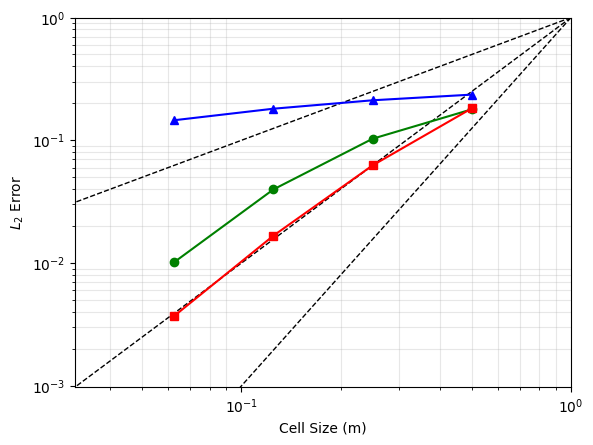

In [48]:
# PLOT L2
plt.plot([1,0.03125], [1, 0.03125], color='k', linewidth=1, linestyle='--')
plt.plot([1,0.03125], [1, 0.03125**2], color='k', linewidth=1, linestyle='--')
plt.plot([1,0.03125], [1, 0.03125**3], color='k', linewidth=1, linestyle='--')
plt.plot(h, L2[0], color='b', marker='^')
plt.plot(h, L2[1], color='g', marker='o')
plt.plot(h, L2[2], color='r', marker='s')

plt.xlim(0.03125,1)
plt.ylim(0.03125**2, 1)
plt.xscale('log')
plt.yscale('log')
plt.grid(visible=True, which='minor', axis='both', alpha=.3)

plt.xlabel('Cell Size (m)')
plt.ylabel(r"$L_2$ Error")
plt.savefig("results/L2.jpg", dpi=1000)

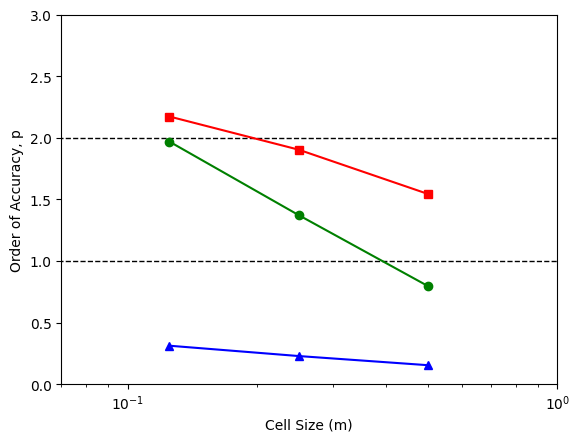

In [5]:
# PLOT p

p = []

for i in range(len(L2)):
    p_row = []
    for j in range(len(L2[i])-1):
        new = np.log(L2[i][j]/L2[i][j+1])/np.log(2)
        p_row.append(new)
    p.append(p_row)
    

plt.hlines([1,2], xmin=0,xmax=1, linewidth=1, linestyle='--', color='k')
plt.plot(h[:-1], p[0], color='b', marker='^')
plt.plot(h[:-1], p[1], color='g', marker='o')
plt.plot(h[:-1], p[2], color='r', marker='s')

plt.xlim(0.07, 1)
plt.ylim(0,3)
plt.xscale('log')

plt.xlabel('Cell Size (m)')
plt.ylabel("Order of Accuracy, p")
plt.savefig("results/p.jpg", dpi=1000)

.

.

.

## BOUNDARY CONDITIONS WALL

3.66e-01
2.48e-03


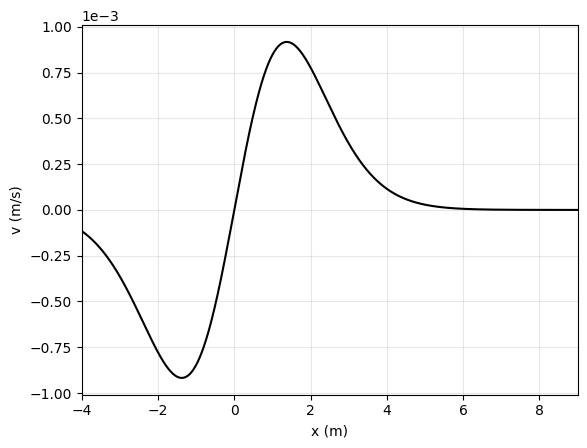

In [37]:
xx = np.linspace(-4,9, 1000)
rr = np.sqrt(np.square(xx)+16)
ft = np.divide(np.tanh(rr), np.square(np.cosh(rr)))
vv = np.multiply(np.divide(xx, rr), ft)/0.3

plt.plot(xx,vv, color='k')
plt.xlim(-4,9)
plt.grid(alpha=.3)

plt.xlabel("x (m)")
plt.ylabel("v (m/s)")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.savefig("results/boundary_top_bottom.jpg", dpi=1000)

print("{:.2e}".format(100*max(vv)/(0.25+max(vv))))
print("{:.2e}".format(100*np.mean(vv)/(0.25+np.mean(vv))))

In [47]:
# GET AVERAGE NUMBER OF ITERATIONS
folders_case = ["CASE_1_(1UD)", "CASE_2_(2UD)", "CASE_3_(MUSCL)"]
folders_mesh = ["mesh_1", "mesh_2", "mesh_3", "mesh_4"]

lenght=[]

for case in folders_case:
    for mesh in folders_mesh:
        data = np.genfromtxt("mesh_verification/{}/{}/results/residuals.csv".format(case,mesh), delimiter=',', skip_header=1)
        lenght.append(data[-1][0])
        
print(np.mean(lenght))

84187.5
